In [10]:
# import libraries
import pandas as pd
from scipy import stats

%matplotlib inline

In [11]:
# import data from /r/conservative scraped using query "vaccine"
conservative_vaccine = pd.read_csv("conservative_vaccine.csv")
politics_vaccine = pd.read_csv("politics_vaccine.csv")
COVID19_vaccine = pd.read_csv("COVID19_vaccine.csv")

<AxesSubplot:title={'center':'Sentiment Analysis of Comments Related to Vaccines'}, xlabel='Date', ylabel='Sentiment Score (higher is more positive)'>

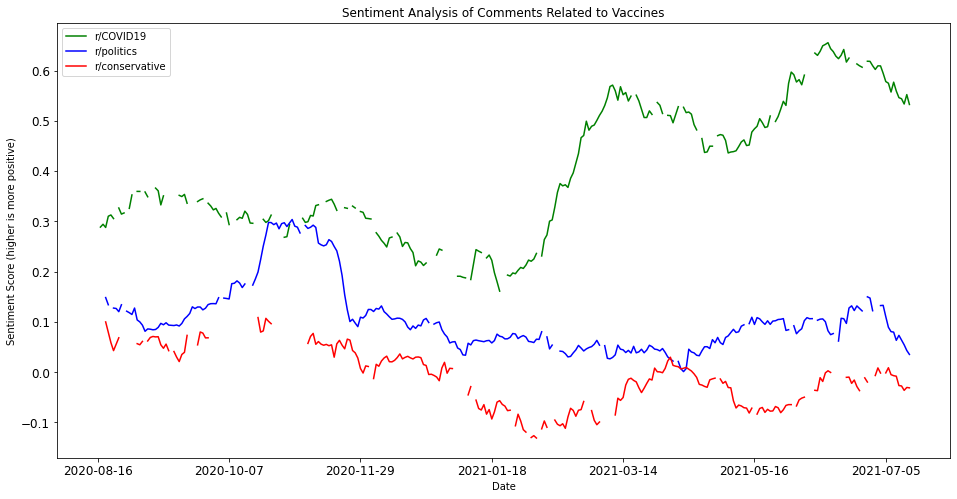

In [12]:
conservative = pd.DataFrame(columns=["r/conservative"])
conservative["r/conservative"] = conservative_vaccine.groupby("date")["compound_sentiment"].mean()
conservative = conservative.rolling(30, min_periods=1)
conservative = conservative.mean()

politics = pd.DataFrame(columns=["r/politics"])
politics["r/politics"] = politics_vaccine.groupby("date")["compound_sentiment"].mean()
politics = politics.rolling(30, min_periods=1)
politics = politics.mean()

COVID19 = pd.DataFrame(columns=["r/COVID19"])
COVID19["r/COVID19"] = COVID19_vaccine.groupby("date")["compound_sentiment"].mean()
COVID19 = COVID19.rolling(30, min_periods=1)
COVID19 = COVID19.mean()

politics = politics.join(conservative, how="outer")
COVID19 = COVID19.join(politics, how="outer")
COVID19 = COVID19.iloc[30:,:]

COVID19.plot(rot=0,xlabel="Date", 
             ylabel="Sentiment Score (higher is more positive)", fontsize=12, color = ['g', 'b', 'r'],
             figsize=(16, 8), title="Sentiment Analysis of Comments Related to Vaccines")

<AxesSubplot:title={'center':'Number of Comments Related to Vaccines'}, xlabel='Date', ylabel='Number of Posts'>

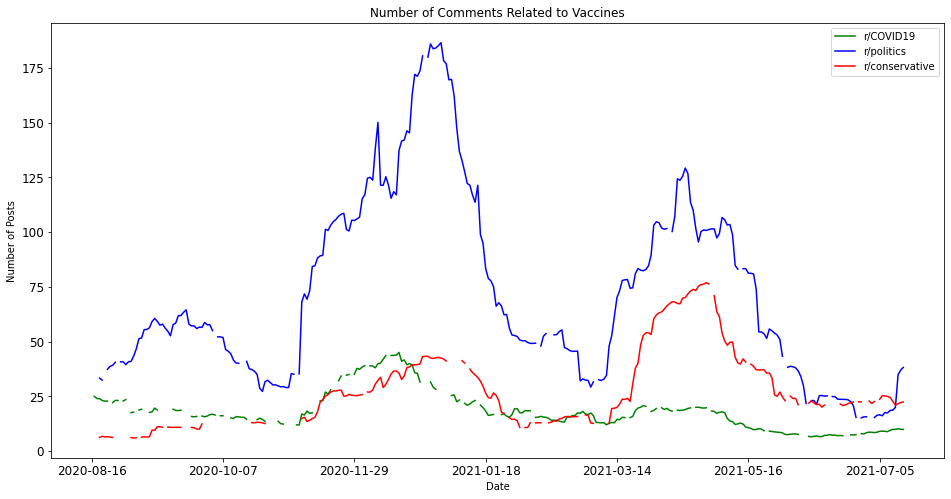

In [4]:
conservative = pd.DataFrame(columns=["r/conservative"])
conservative["r/conservative"] = conservative_vaccine.groupby("date")["compound_sentiment"].count()
conservative = conservative.rolling(30, min_periods=1)
conservative = conservative.mean()

politics = pd.DataFrame(columns=["r/politics"])
politics["r/politics"] = politics_vaccine.groupby("date")["compound_sentiment"].count()
politics = politics.rolling(30, min_periods=1)
politics = politics.mean()

COVID19 = pd.DataFrame(columns=["r/COVID19"])
COVID19["r/COVID19"] = COVID19_vaccine.groupby("date")["compound_sentiment"].count()
COVID19 = COVID19.rolling(30, min_periods=1)
COVID19 = COVID19.mean()

politics = politics.join(conservative, how="outer")
COVID19 = COVID19.join(politics, how="outer")
COVID19 = COVID19.iloc[30:,:]

COVID19.plot(rot=0,xlabel="Date", 
             ylabel="Number of Posts", fontsize=12, color = ['g', 'b', 'r'],
             figsize=(16, 8), title="Number of Comments Related to Vaccines")